In [45]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine

In [2]:
#create the credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
heart_db = 'heartdisease'

In [3]:
#create the engine
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, heart_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

#dispose of the engine
engine.dispose()

In [4]:
#unsure of the name of the iris database in the thinkful repo
#so we'll just call it from the sklearn library
iris_df = datasets.load_iris()
#since the data is conveniently separated already, we'll call
#them to their respective variables.
X = iris_df.data
y = iris_df.target

In [6]:
#transform the data
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [11]:
#create a function to allow for quick changes to clusters
def kmeans_test(n):
    kmeans_cluster = KMeans(n_clusters=n, random_state=357)
    kmeans_cluster.fit(X_trans)
    y_pred = kmeans_cluster.predict(X_trans)
    #copied from the lesson
    pca = PCA(n_components=2).fit_transform(X_trans)
    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

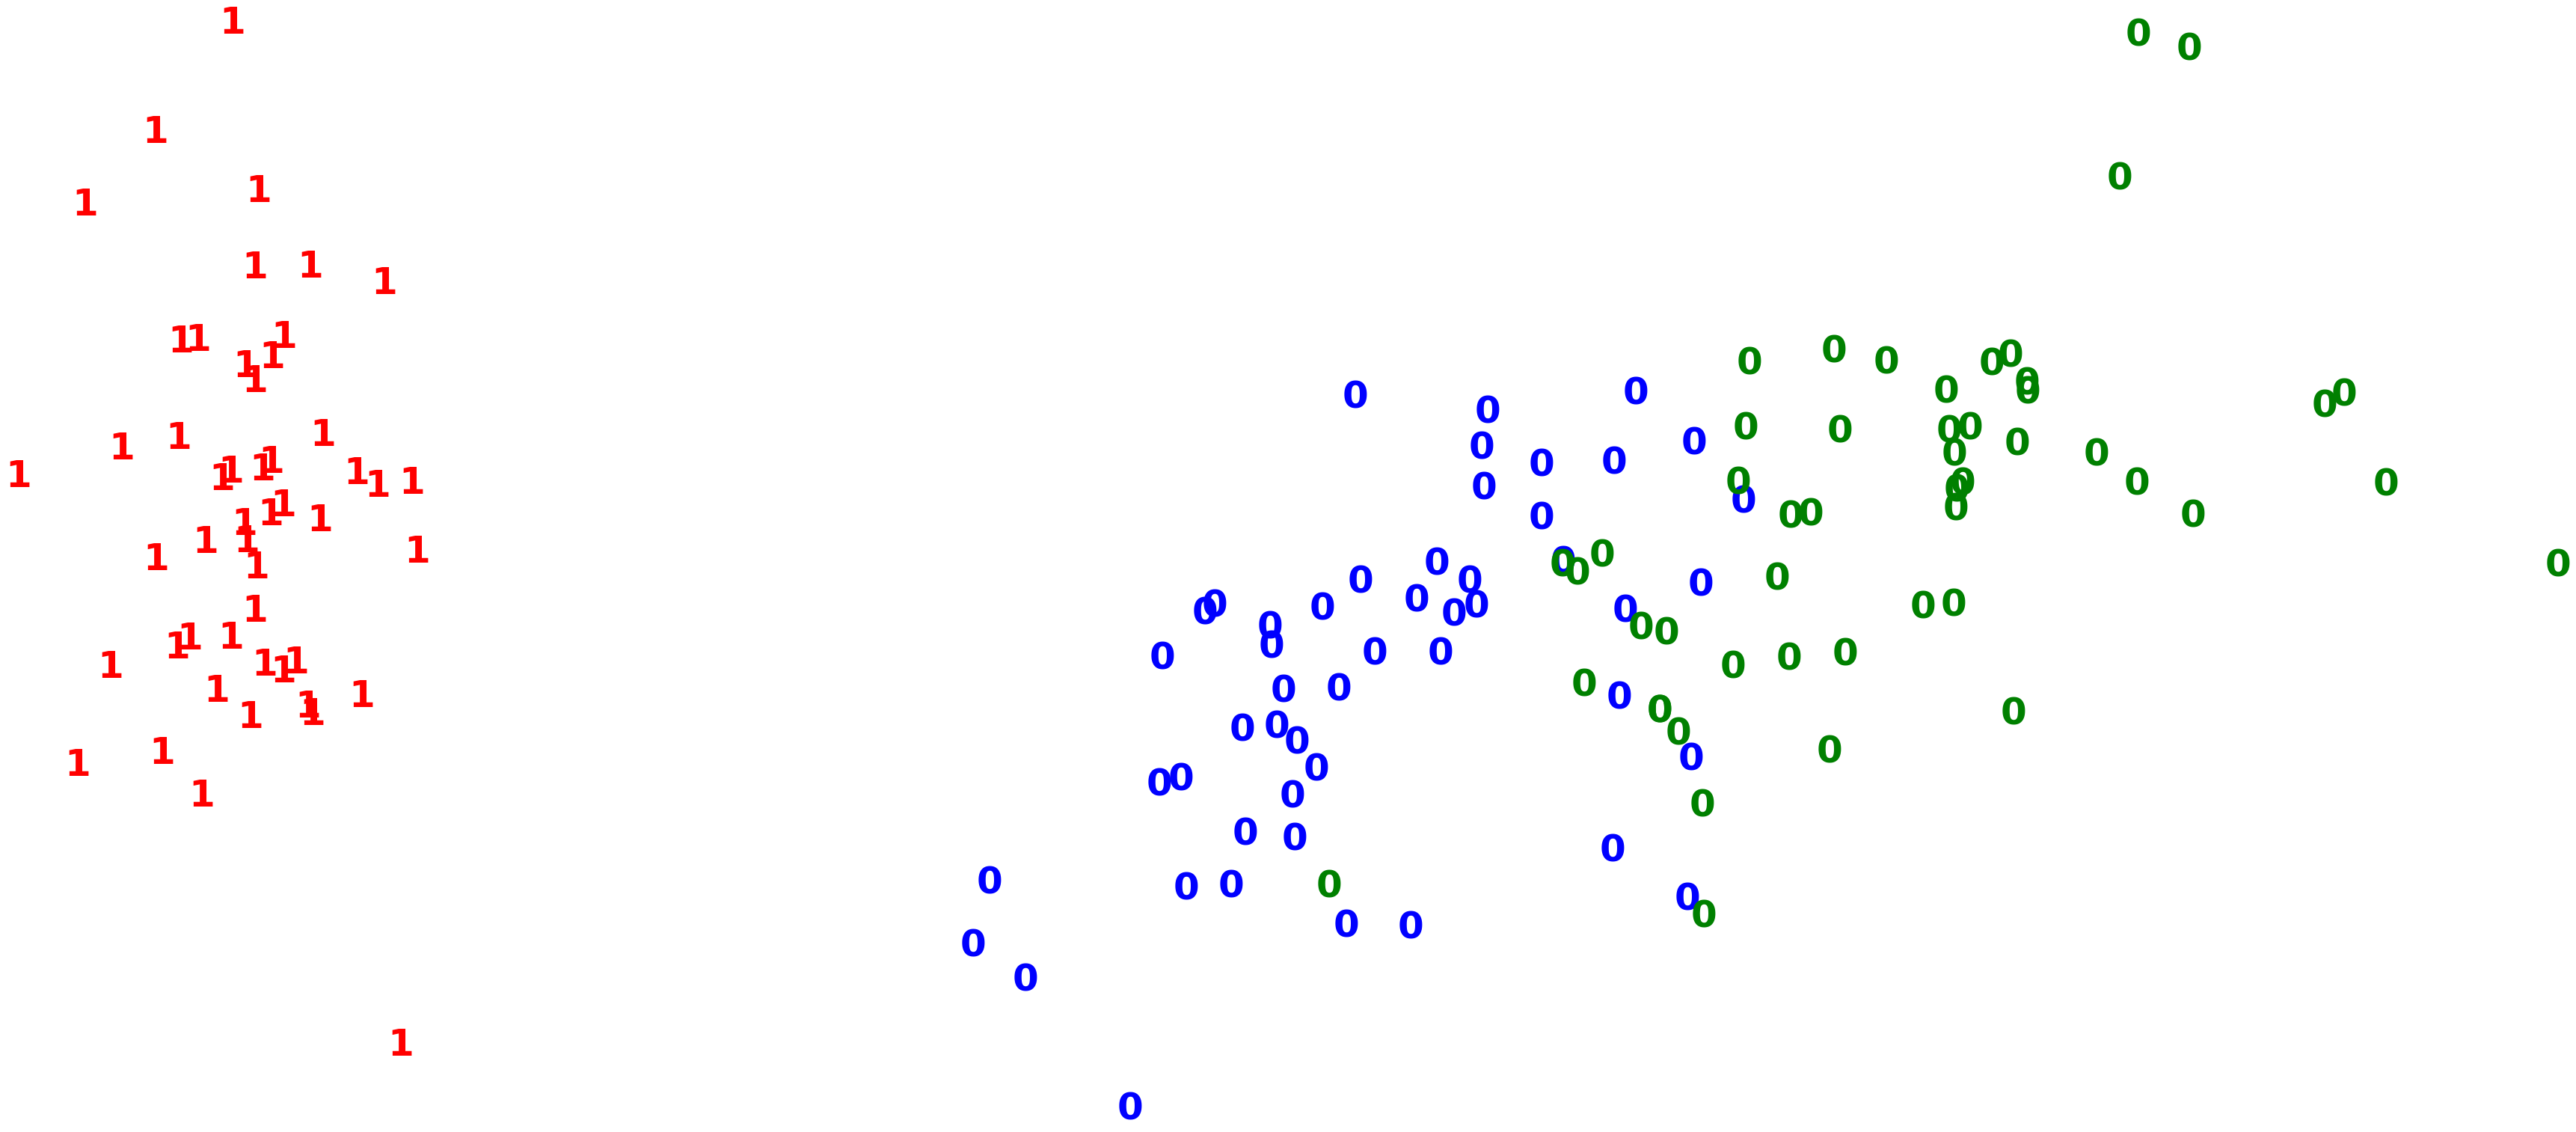

In [13]:
kmeans_test(2)

In testing, having a n_cluster=2 gives us a correct identification for the linearly separale. Increasing the clusters does not allow for a clean delineation between the other two.

In [19]:
#create a function to allow for quick changes to clusters
def mbkmeans_test(n, m):
    minikmeans_cluster = MiniBatchKMeans(
        init='random', n_clusters=n, batch_size=m)
    minikmeans_cluster.fit(X_trans)
    minikmeans_cluster = minikmeans_cluster.predict(X_trans)
    #copied from the lesson
    pca = PCA(n_components=2).fit_transform(X_trans)
    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

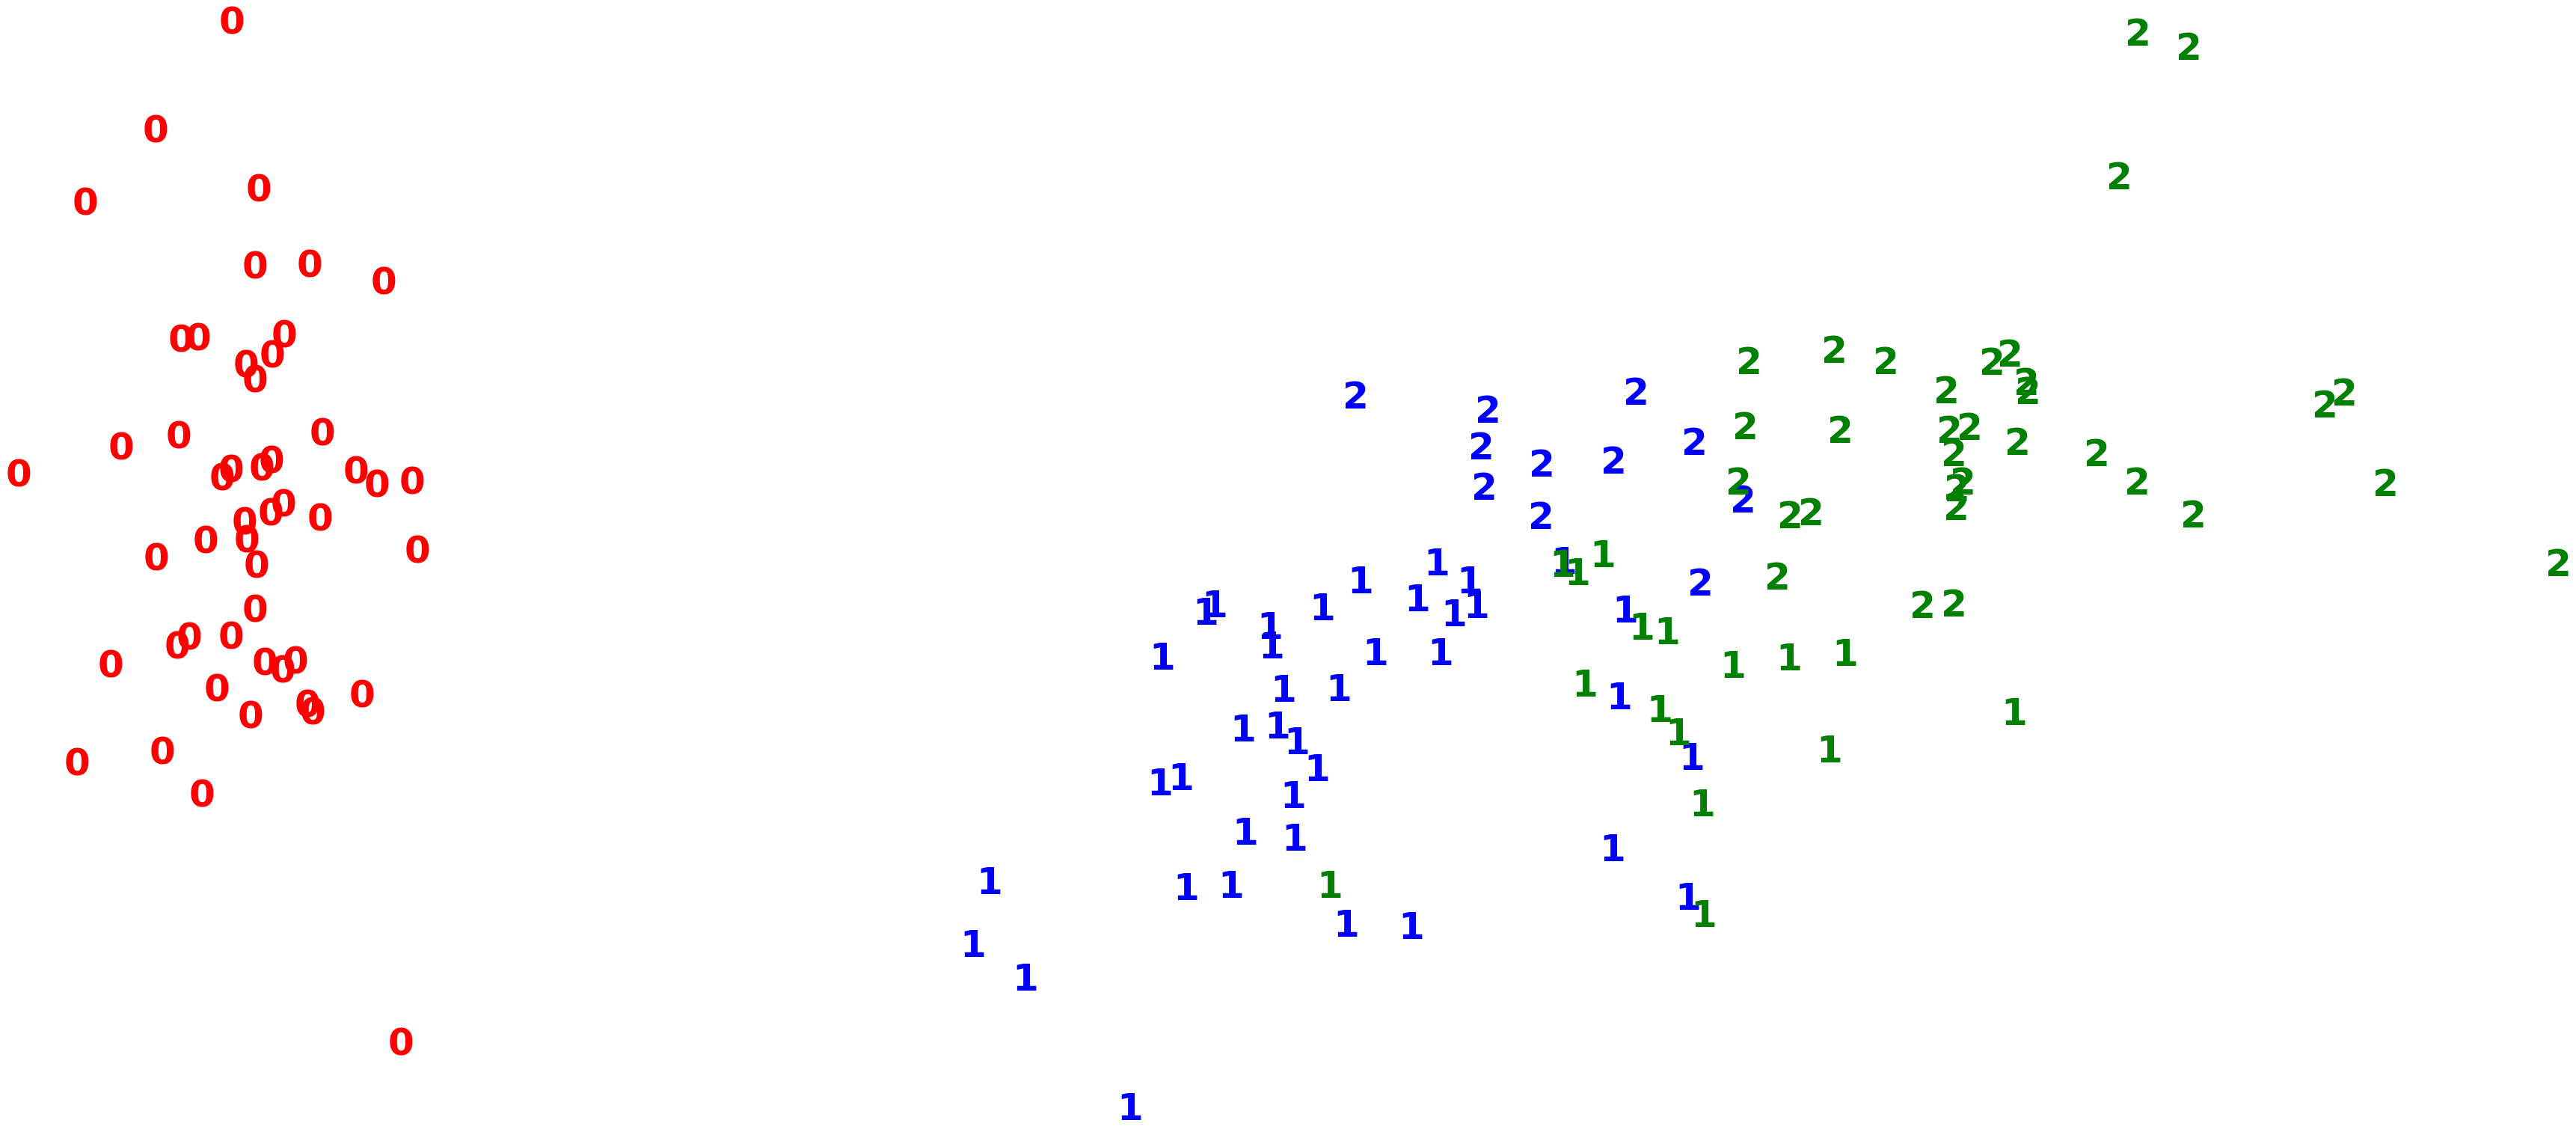

In [31]:
mbkmeans_test(3, 50)

Similar to above, we see that the linearly separable one is properly identified. Increasing n_clusters or the batch_size does not allow for delineation of the other two. While this is faster, given the smallness and simplicity of the set, the time difference is currently neglegible.

In [39]:
#copied this portion of the code 
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)
X_trans = scaler.fit_transform(X)

In [53]:
#we'll try it without scaling first and see what it looks
#like and then repeat it after scaling
##gave a value error so we'll scale it and see if it fixes it
#create a function to allow for quick changes to clusters
def kmeans_test(n):
    kmeans_cluster = KMeans(n_clusters=n, random_state=357)
    kmeans_cluster.fit(X)
    y_pred = kmeans_cluster.predict(X)
    #copied from the lesson
    pca = PCA(n_components=2).fit_transform(X)
    plt.scatter(pca[:,0], pca[:,1], c=y_pred)
    plt.show()
    confusion = confusion_matrix(y_pred, y, labels=[1, 0])
    print(confusion)

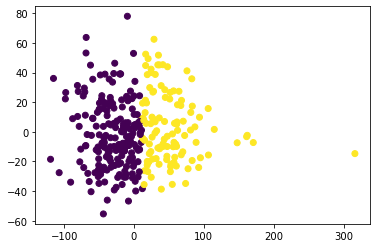

[[ 50  61]
 [114  78]]


In [54]:
kmeans_test(2)

Confusion matrix looks really bad with it performing under 50%. We'll scale it and try again.

In [55]:
def kmeans_test(n):
    kmeans_cluster = KMeans(n_clusters=n, random_state=357)
    kmeans_cluster.fit(X_trans)
    y_pred = kmeans_cluster.predict(X_trans)
    #copied from the lesson
    pca = PCA(n_components=2).fit_transform(X_trans)
    plt.scatter(pca[:,0], pca[:,1], c=y_pred)
    plt.show()
    confusion = confusion_matrix(y_pred, y, labels=[1, 0])
    print(confusion)

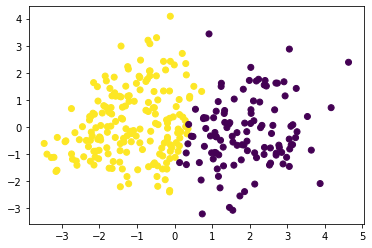

[[151  38]
 [ 13 101]]


In [56]:
kmeans_test(2)

Confusion matrix looks much better now.